In [1]:
import numpy as np
from sklearn import preprocessing
import re
import os
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
enert= np.load('../data_features/internal_energy_T_298.npy')
G= np.load('../data_features/coulomb_matrix.npy')
g_st= preprocessing.MaxAbsScaler().fit_transform(G)
print '*********************'
print 'g_st ', g_st.shape
print 'enert ', enert.shape
np.save('g_scaled_coulomb_matrix', g_st)

*********************
g_st  (97744, 29)
enert  (97744,)


In [3]:
#G_scaled= g_st[:20000,:]
#E=np.reshape(enert[:20000],(len(enert[:20000]),1))
G_scaled= g_st
E=np.reshape(enert,(len(enert),1))
print E.shape
print G_scaled.shape

mixer= np.array(range(G_scaled.shape[0]))
for _ in range(10000):
    np.random.shuffle(mixer)
n= int(len(mixer)*0.75) # marking the 90%
G_train_scaled= G_scaled[mixer[:n]]
G_vali_scaled= G_scaled[mixer[n:]]
E_train= E[mixer[:n]]
E_vali= E[mixer[n:]]
trai_id= mixer[:n]
vali_id= mixer[n:]
print 'G_train_scaled->', G_train_scaled.shape
print 'G_vali_scaled->', G_vali_scaled.shape
print 'E_train->', E_train.shape
print 'E_vali->', E_vali.shape
np.save('E_coulomb_matrix', E)
np.save('trai_id_coulomb_matrix', trai_id)
np.save('vali_id_coulomb_matrix', vali_id)

(97744, 1)
(97744, 29)
G_train_scaled-> (73308, 29)
G_vali_scaled-> (24436, 29)
E_train-> (73308, 1)
E_vali-> (24436, 1)


In [8]:

#params = {'n_estimators': 600, 'max_depth': 7, 'min_samples_split': 2,
#          'learning_rate': 0.1090, 'loss': 'ls', 'min_samples_leaf':2} #val MSE: 9.0210 MAE 1.6975
#tra MSE: 1.5811 MAE 0.9495
#params = {'n_estimators': 800, 'max_depth': 7, 'min_samples_split': 8,
#          'learning_rate': 0.1090, 'loss': 'ls', 'min_samples_leaf':8} #val MSE: 9.8413 MAE 1.6456
#tra MSE: 1.5153 MAE 0.9137
#params = {'n_estimators': 1000, 'max_depth': 5, 'min_samples_split': 12,
#          'learning_rate': 0.1090, 'loss': 'ls', 'min_samples_leaf':12} #val MSE: 14.9416 MAE 1.8662
#tra MSE: 3.5126 MAE 1.3609
#params = {'n_estimators': 1000, 'max_depth': 8, 'min_samples_split': 5,
#          'learning_rate': 0.1090, 'loss': 'ls', 'min_samples_leaf':5} #val MSE: 10.0680 MAE 1.4897
#tra MSE: 0.4963 MAE 0.5196
#params = {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 5,
#          'learning_rate': 0.1090, 'loss': 'ls', 'min_samples_leaf':5} #val MSE: 11.0624 MAE 1.6310
#tra MSE: 1.3965 MAE 0.8721
params = {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 2,
          'learning_rate': 0.1090, 'loss': 'ls', 'min_samples_leaf':2} #val MSE: 11.0624 MAE 1.6310
#tra MSE: 1.3965 MAE 0.8721
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(G_train_scaled, E_train)
mse = mean_squared_error(E_vali, clf.predict(G_vali_scaled))
mae= mean_absolute_error(E_vali, clf.predict(G_vali_scaled))
print("val MSE: %.4f MAE %.4f" % (mse,mae))
mse = mean_squared_error(E_train, clf.predict(G_train_scaled))
mae= mean_absolute_error(E_train, clf.predict(G_train_scaled))
print("tra MSE: %.4f MAE %.4f" % (mse,mae))

val MSE: 9.9270 MAE 1.5927
tra MSE: 1.1018 MAE 0.7832


In [9]:
diff_vali= np.abs(np.subtract(np.squeeze(E_vali), np.squeeze(clf.predict(G_vali_scaled))))
diff_trai= np.abs(np.subtract(np.squeeze(E_train), np.squeeze(clf.predict(G_train_scaled))))

In [12]:
print np.max(diff_vali), np.max(diff_trai)

130.974522824 7.526936463


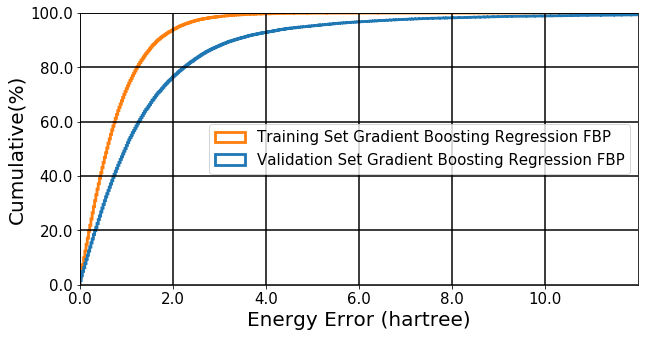

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
n, bins, patches = ax.hist([diff_vali, diff_trai], 5000, normed=1, histtype='step',
                           cumulative=True,linewidth=2.8, label=['Validation Set Gradient Boosting Regression FBP',\
                                                   'Training Set Gradient Boosting Regression FBP'])

#ax.grid(True, linewidth=10)
#ax.legend(loc='lower right')
lg = ax.legend( loc='center right', fontsize= 15)
ax.grid(True, linewidth=10)
ax.set_ylim(0.0,1.00)
ax.set_xlim(0.0,12.00)
ax.set_xticks(np.arange(0.0,12.0,2.0))
ax.set_xticklabels(np.arange(0.0,12.0,2.0))
ax.set_yticks(np.arange(0.0,1.05,0.2))
ax.set_yticklabels(np.arange(0.0,101.0,20.0))
ax.xaxis.set_tick_params(labelsize=15) 
ax.yaxis.set_tick_params(labelsize=15) 
ax.grid(color='k', linestyle='-', linewidth=1.5)
ax.grid(color='k', linestyle='-', linewidth=1.5)
#ax.set_title('CO1214 structures')
ax.set_xlabel('Energy Error (hartree)', fontsize=20)
ax.set_ylabel('Cumulative(%)', fontsize=20)
plt.savefig('imgage_comulative_error_CO14.pdf', format='pdf')
plt.show()

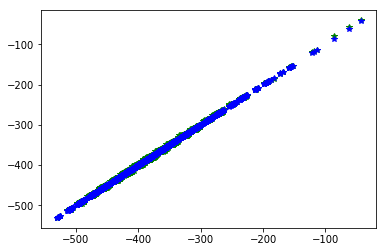

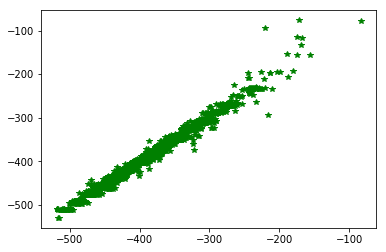

MSE: 1.5811


In [5]:
Ebr_vali= clf.predict(G_vali_scaled)

Ebr_train= clf.predict(G_train_scaled)

plt.plot(Ebr_train, np.squeeze(E_train), '*g', Ebr_train, Ebr_train, '*b')
plt.show()

plt.plot(Ebr_vali, np.squeeze(E_vali), '*g')#, Ebr_vali, Ebr_vali, '*b')
plt.show()

mse = mean_squared_error(E_train, clf.predict(G_train_scaled))
print("MSE: %.4f" % mse)

1.33247981823
1.07495264268e-05
0.134044541276


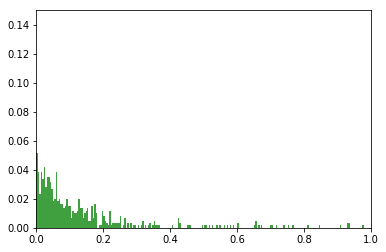

In [8]:
diff_vali= np.abs(np.subtract(Ebr_vali, np.squeeze(E_vali)))
print np.max(diff_vali)
print np.min(diff_vali)
diff_vali_aver= np.average(diff_vali)
print diff_vali_aver

n, bins, patches = plt.hist(diff_vali, 300, facecolor='g', alpha=0.75)
plt.axis([0.0, 1.0, 0, 0.15])
for item in patches:
    item.set_height(item.get_height()/sum(n))
plt.show()

In [8]:
print E_vali.shape
E_vali1d= np.squeeze(E_vali)

(240, 1)


In [9]:
E_b= clf.predict(G_vali_scaled)
print E_b.shape

(240,)


In [10]:
print np.average(np.abs(np.subtract(E_vali1d, E_b)))

0.020570270253


In [65]:
np.save('../analysis/diff_vali_grad_bost_X_oni_48', diff_vali)

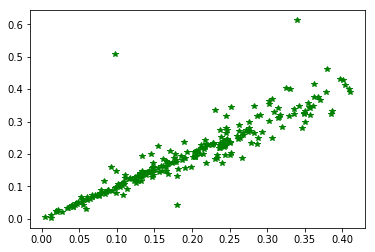

In [12]:
plt.plot(Ebr_vali, np.squeeze(E_vali), '*g')
plt.show()

In [12]:
np.save('g_vali_scaled', G_vali_scaled)
np.save('E_vali', E_vali)
np.save('g_trai_scaled', G_train_scaled)
np.save('E_trai', E_train)
np.save('E_vali_pred', clf.predict(G_vali_scaled))

In [13]:
np.save('E_vali_pred', clf.predict(G_vali_scaled))

In [5]:
np.save('E_pred', clf.predict(g_st))